
### Projeto do Módulo Técnicas de Programação em Python: O Objetivo é realizar uma análise exploratória de dados utilizando datasets relacionados ao Brasil. Você está livre para incluir quantas bases considerar necessário e filtrar as informações mais relevantes para sua história.  

**PROJETO DESENVOLVIDO PELOS ALUNOS: Leandro Republicano, Leticia da Luz e Orestes Dos Santos.**


## O objetivo do nosso estudo é analisar o padrão de preferência de gêneros de filmes entre os brasileiros, com base nos dados disponibilizados pela Netflix. Além disso, pretendemos investigar se essa preferência varia ao longo do tempo, como, por exemplo, durante as férias escolares. Vamos também tirar outros insights como quais os filmes que ficaram por mais tempo nos TOP 10 (por mais de uma semana) e qual o tempo médio de duração dos filmes assistidos.


**O arquivo que contém as listas semanais dos títulos mais assistidos na Netflix em todo o mundo por país, está no drive e é denominado "all-weeks-countries.xlsx" e foi atualizado pela última vez em 05/02/2024. Ele também está disponível através do seguinte link: https://www.netflix.com/tudum/top10/. Ao final da página, é possível fazer o download do arquivo.**
- **Obs.: Os dados começaram a ser coletados em 28 de junho de 2021.**

**Quanto ao arquivo que contém a lista de todos os filmes mundiais, juntamente com as características mais relevantes de cada filme, esta no drive com o nome de "data.tsv". Ele pode ser acessado através do link: https://developer.imdb.com/non-commercial-datasets/. O site da IMDb oferece arquivos interessantes sobre todos os filmes mundiais, e todas as listas são atualizadas diariamente. No início da página, é informado que você pode clicar no link https://datasets.imdbws.com/ para realizar o download dos arquivos de interesse. Para o nosso estudo, optamos pelo arquivo 'title.basics.tsv.gz'.**









In [1]:
#Importação de bibliotecas
import pandas as pd
import numpy as np

In [2]:
# Montando o Google Drive no ambiente do Colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Arquivo Netflix

In [3]:
# Caminho do arquivo da Netflix (trocar conforme integrante)
caminho_xlsx = '/content/drive/My Drive/Colab Notebooks/dados_netflix/all-weeks-countries.xlsx'

In [4]:
# Carregando o arquivo xlsx usando Pandas
dados_netflix = pd.read_excel(caminho_xlsx)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
dados_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253660 entries, 0 to 253659
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   country_name                253660 non-null  object
 1   country_iso2                253660 non-null  object
 2   week                        253660 non-null  object
 3   category                    253660 non-null  object
 4   weekly_rank                 253660 non-null  int64 
 5   show_title                  253660 non-null  object
 6   season_title                122416 non-null  object
 7   cumulative_weeks_in_top_10  253660 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 15.5+ MB


### Dicionários dos dados:
- **country_name:** Nome do país: Tipo String
- **country_iso2:** Código ISO de duas letras do país: Tipo String
- **week:** Semana em que os dados foram registrados: Tipo String
- **category:** Categoria à qual o programa pertence: Tipo String
- **weekly_rank:** Classificação semanal do programa: Tipo Inteiro
- **show_title:** Título do programa de TV: Tipo String
- **season_title:** Título da temporada do programa: Tipo String
- **cumulative_weeks_in_top_10:** Número acumulado de semanas em que o programa esteve no top 10: Tipo Inteiro


In [6]:
# Visualizando as primeiras linhas do DataFrame
dados_netflix.head()

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2024-02-04,Films,1,Badland Hunters,NaN,2
1,Argentina,AR,2024-02-04,Films,2,Mindcage,NaN,2
2,Argentina,AR,2024-02-04,Films,3,Society of the Snow,NaN,5
3,Argentina,AR,2024-02-04,Films,4,Finding You,NaN,1
4,Argentina,AR,2024-02-04,Films,5,"Twenty-Something, Divorced and Fabulous",NaN,1


In [7]:
# Dimensões do DataFrame, linhas e colunas
dados_netflix.shape

(253660, 8)

### Filtrando as colunas para obter apenas os resultados onde a categoria é fimes no Brasil

In [8]:
#Filtrando os dados
brasil_netflix_films = dados_netflix[
    (dados_netflix["country_name"].str.contains("Brazil", regex=False)) &
    (dados_netflix["category"].str.contains("Films", regex=False))
]
display(brasil_netflix_films)

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
21760,Brazil,BR,2024-02-04,Films,1,Badland Hunters,NaN,2
21761,Brazil,BR,2024-02-04,Films,2,Finding You,NaN,1
21762,Brazil,BR,2024-02-04,Films,3,Orion and the Dark,NaN,1
21763,Brazil,BR,2024-02-04,Films,4,The Greatest Night in Pop,NaN,1
21764,Brazil,BR,2024-02-04,Films,5,Mindcage,NaN,3
...,...,...,...,...,...,...,...,...
24465,Brazil,BR,2021-07-04,Films,6,Wish Dragon,NaN,1
24466,Brazil,BR,2021-07-04,Films,7,Kung Fu Panda 3,NaN,1
24467,Brazil,BR,2021-07-04,Films,8,Warcraft,NaN,1
24468,Brazil,BR,2021-07-04,Films,9,Good on Paper,NaN,1


### Removendo colunas que não serão utilizadas em nossas análises: country_iso2, weekly_rank, cumulative_weeks_in_top_10

In [9]:
brasil_netflix_films = brasil_netflix_films.drop(['country_iso2', 'weekly_rank', 'cumulative_weeks_in_top_10', 'season_title' ], axis=1)
brasil_netflix_films.head()

,country_name,week,category,show_title
21760,Brazil,2024-02-04,Films,Badland Hunters
21761,Brazil,2024-02-04,Films,Finding You
21762,Brazil,2024-02-04,Films,Orion and the Dark
21763,Brazil,2024-02-04,Films,The Greatest Night in Pop
21764,Brazil,2024-02-04,Films,Mindcage


# Arquivo IMDb

In [10]:
# Caminho para o arquivo IMDb, características básicas dos filmes: (trocar conforme integrante)
caminho_tsv = '/content/drive/My Drive/Colab Notebooks/dados_netflix/data.tsv'

In [11]:
# Carregando o arquivo da IMDb:
dados_imdb = pd.read_csv(caminho_tsv, sep='\t')

<ipython-input-11-36c9fd8d38e5>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  dados_imdb = pd.read_csv(caminho_tsv, sep='\t')


In [12]:
dados_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10544472 entries, 0 to 10544471
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 724.0+ MB


### Dicionários dos dados:
- **tconst:** É um identificador exclusivo para cada título de filme ou programa de TV. Esse identificador é único dentro do conjunto de dados e pode ser usado como chave primária.
- **titleType:** Indica o tipo de título, que pode ser "movie" para filmes ou "tvSeries" para séries de TV, por exemplo. É uma maneira de categorizar os diferentes tipos de conteúdo.
- **primaryTitle:** É o título principal do filme ou programa de TV, geralmente o título mais reconhecido ou utilizado.
- **originalTitle:** Representa o título original do filme ou programa de TV, que pode ser diferente do título principal. É comum em casos de filmes estrangeiros.
- **isAdult:** Indica se o título é classificado como conteúdo adulto. Pode ser "0" para não adulto ou "1" para adulto.
- **startYear:** O ano de lançamento ou estreia do filme ou programa de TV.
- **endYear: O ano de término para séries de TV ou programas que têm um período de exibição.**
- **runtimeMinutes:** A duração do filme ou programa de TV em minutos.
- **genres:** Uma lista de gêneros associados ao título, separados por vírgula. Por exemplo, "Ação, Aventura, Drama"


In [13]:
# Visualizando as primeiras linhas do DataFrame
dados_imdb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [14]:
# Dimensões do DataFrame, linhas e colunas
dados_imdb.shape

(10544472, 9)

Como queremos cruzar apenas informações dos filmes e a IMDb fornece dados de vários conteúdos, vamos realizar um filtro.

In [15]:
#Filtrando os dados
dados_imdb_movie = dados_imdb[dados_imdb["titleType"].str.contains("movie", regex=False)]
display(dados_imdb_movie)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
...,...,...,...,...,...,...,...,...,...
10544363,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary
10544390,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
10544402,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy
10544412,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,Drama


In [16]:
#Removendo as colunas que não serão utilizadas em nossas análises
dados_imdb_br = dados_imdb_movie.drop(["tconst","endYear", "isAdult"], axis =1)
dados_imdb_br.head()

,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
8,movie,Miss Jerry,Miss Jerry,1894,45,Romance
144,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport"
498,movie,Bohemios,Bohemios,1905,100,\N
570,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography"
587,movie,The Prodigal Son,L'enfant prodigue,1907,90,Drama


In [17]:
#Renomeando as colunas para executar o merge
brasil_netflix_films.rename(columns={'show_title': 'titulo'}, inplace=True)
dados_imdb_br.rename(columns={'primaryTitle': 'titulo'}, inplace=True)

In [18]:
brasil_netflix_films.head()

,country_name,week,category,titulo
21760,Brazil,2024-02-04,Films,Badland Hunters
21761,Brazil,2024-02-04,Films,Finding You
21762,Brazil,2024-02-04,Films,Orion and the Dark
21763,Brazil,2024-02-04,Films,The Greatest Night in Pop
21764,Brazil,2024-02-04,Films,Mindcage


In [19]:
dados_imdb_br.head()

,titleType,titulo,originalTitle,startYear,runtimeMinutes,genres
8,movie,Miss Jerry,Miss Jerry,1894,45,Romance
144,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport"
498,movie,Bohemios,Bohemios,1905,100,\N
570,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography"
587,movie,The Prodigal Son,L'enfant prodigue,1907,90,Drama


### Nossa intenção agora é mesclar os dois DataFrames com base na coluna 'titulo', de modo que os dados combinem informações de ambas as tabelas

In [20]:
#merge das duas colunas
filmes_brasil_car = pd.merge(brasil_netflix_films, dados_imdb_br, how='left', on='titulo')

In [21]:
filmes_brasil_car.shape

(3789, 9)

In [22]:
filmes_brasil_car.head(10)

,country_name,week,category,titulo,titleType,originalTitle,startYear,runtimeMinutes,genres
0,Brazil,2024-02-04,Films,Badland Hunters,movie,Hwang-ya,2024,107,"Action,Adventure,Drama"
1,Brazil,2024-02-04,Films,Finding You,movie,Finding You,2019,97,"Drama,Romance"
2,Brazil,2024-02-04,Films,Finding You,movie,Finding You,2020,119,"Drama,Romance"
3,Brazil,2024-02-04,Films,Orion and the Dark,movie,Orion and the Dark,2024,93,"Adventure,Animation,Comedy"
4,Brazil,2024-02-04,Films,The Greatest Night in Pop,movie,The Greatest Night in Pop,2024,96,"Documentary,Music"
5,Brazil,2024-02-04,Films,Mindcage,movie,Mindcage,2022,96,"Crime,Drama,Mystery"
6,Brazil,2024-02-04,Films,Society of the Snow,movie,La sociedad de la nieve,2023,144,"Adventure,Drama,History"
7,Brazil,2024-02-04,Films,Lift,movie,Lift,1997,91,Sci-Fi
8,Brazil,2024-02-04,Films,Lift,movie,Lift,2001,85,"Crime,Drama"
9,Brazil,2024-02-04,Films,Lift,movie,Lift,2006,88,Thriller


In [23]:
filmes_brasil_car.tail(10)

,country_name,week,category,titulo,titleType,originalTitle,startYear,runtimeMinutes,genres
3779,Brazil,2021-07-04,Films,Silver Skates,movie,Silver Skates,1943,78,Musical
3780,Brazil,2021-07-04,Films,Silver Skates,movie,Serebryanye konki,2020,130,"Adventure,Drama,Family"
3781,Brazil,2021-07-04,Films,Skylines,movie,Skylines,2020,113,"Action,Adventure,Sci-Fi"
3782,Brazil,2021-07-04,Films,What Men Want,movie,What Men Want,1930,65,"Drama,Romance"
3783,Brazil,2021-07-04,Films,What Men Want,movie,What Men Want,2019,117,"Comedy,Fantasy,Romance"
3784,Brazil,2021-07-04,Films,Wish Dragon,movie,Wish Dragon,2021,98,"Adventure,Animation,Comedy"
3785,Brazil,2021-07-04,Films,Kung Fu Panda 3,movie,Kung Fu Panda 3,2016,95,"Action,Adventure,Animation"
3786,Brazil,2021-07-04,Films,Warcraft,movie,Warcraft,2016,123,"Action,Adventure,Fantasy"
3787,Brazil,2021-07-04,Films,Good on Paper,movie,Good on Paper,2021,92,"Comedy,Romance"
3788,Brazil,2021-07-04,Films,Bumblebee,movie,Bumblebee,2018,114,"Action,Adventure,Sci-Fi"


### Aproximadamente 23,7% dos filmes na base não têm tempo de duração para análise.


In [24]:
filmes_brasil_car["titulo"].value_counts()

Paradise             188
Home                 120
Blackout              82
Redemption            76
Inheritance           74
                    ... 
El Jeremías            1
The Perfumier          1
Jiu Jitsu              1
A Jazzman's Blues      1
Bumblebee              1
Name: titulo, Length: 732, dtype: int64

### Criando a faixa tempo


In [25]:
# Transformando a variavel runtimeMinutes para numerico
filmes_brasil_car['runtimeMinutes'] = pd.to_numeric(filmes_brasil_car['runtimeMinutes'], errors='coerce').astype('Int64')
filmes_brasil_car['runtimeMinutes'].value_counts().sort_index(ascending=False)

300    2
200    4
191    2
185    1
180    2
      ..
45     5
31     2
27     2
15     1
7      2
Name: runtimeMinutes, Length: 123, dtype: Int64

In [26]:
# 0-50 minutos: Filmes Curtos
# 51-100 minutos: Filmes Médios
# 101-150 minutos: Filmes Longos
# 151+ minutos: Filmes Muito Longos

bins = [0, 50, 100, 150, np.inf]
labels = ['Filmes Curtos', 'Filmes Médios', 'Filmes Longos', 'Filmes Muito Longos']

# Criando a nova coluna 'faixa_tempo' com as categorias definidas
filmes_brasil_car['faixa_tempo'] = pd.cut(filmes_brasil_car['runtimeMinutes'], bins=bins, labels=labels, right=False)

In [27]:
# frequencia da variavel
filmes_brasil_car['faixa_tempo'].value_counts()

Filmes Médios          1484
Filmes Longos          1210
Filmes Muito Longos      50
Filmes Curtos            29
Name: faixa_tempo, dtype: int64

In [28]:
filmes_brasil_car.head()

,country_name,week,category,titulo,titleType,originalTitle,startYear,runtimeMinutes,genres,faixa_tempo
0,Brazil,2024-02-04,Films,Badland Hunters,movie,Hwang-ya,2024,107,"Action,Adventure,Drama",Filmes Longos
1,Brazil,2024-02-04,Films,Finding You,movie,Finding You,2019,97,"Drama,Romance",Filmes Médios
2,Brazil,2024-02-04,Films,Finding You,movie,Finding You,2020,119,"Drama,Romance",Filmes Longos
3,Brazil,2024-02-04,Films,Orion and the Dark,movie,Orion and the Dark,2024,93,"Adventure,Animation,Comedy",Filmes Médios
4,Brazil,2024-02-04,Films,The Greatest Night in Pop,movie,The Greatest Night in Pop,2024,96,"Documentary,Music",Filmes Médios


### Observamos que muitos filmes têm títulos iguais. Infelizmente, a Netflix não fornece o ano de lançamento dos filmes para comparação por ano. No entanto, ela nos oferece o período em que os filmes permaneceram no top 10. Ao examinar os títulos, notamos que é improvável que um filme de 1992 permaneça entre os top 10. Provavelmente, o filme em destaque é um lançamento mais recente e os demais foram filtrados juntos justamente por apresentaram o mesmo título. Além disso, identificamos que um mesmo filme pode apresentar linhas duplicadas, possivelmente devido por ter permanecido por mais de uma semana no Top 10. Um exemplo é Kung Fu Panda 3:
- Comparando o Dataset da Netflix Brasil, temos 2429 linhas duplicadas

In [29]:
filmes_brasil_car.loc[filmes_brasil_car['titulo'] == 'Kung Fu Panda 3']

,country_name,week,category,titulo,titleType,originalTitle,startYear,runtimeMinutes,genres,faixa_tempo
1237,Brazil,2023-05-14,Films,Kung Fu Panda 3,movie,Kung Fu Panda 3,2016,95,"Action,Adventure,Animation",Filmes Médios
3785,Brazil,2021-07-04,Films,Kung Fu Panda 3,movie,Kung Fu Panda 3,2016,95,"Action,Adventure,Animation",Filmes Médios


## Primeiramente vamos converter a coluna Week para o formato correto em todo dataset, uma vez que estes dados serão usados futuramente.
- Vamos também extrair os filmes que não apresentam linhas duplicadas e dividir o Dataset para tratamento

In [30]:
# Convertendo a coluna 'week' para o formato datetime
filmes_brasil_car['week'] = pd.to_datetime(filmes_brasil_car['week'])

In [31]:
# Criando um novo DataFrame com as linhas duplicadas
filmes_duplicados = filmes_brasil_car[filmes_brasil_car.duplicated(subset='titulo', keep=False)]

In [32]:
filmes_duplicados.shape

(3565, 10)

In [33]:
filmes_duplicados.head(10)

,country_name,week,category,titulo,titleType,originalTitle,startYear,runtimeMinutes,genres,faixa_tempo
0,Brazil,2024-02-04,Films,Badland Hunters,movie,Hwang-ya,2024,107,"Action,Adventure,Drama",Filmes Longos
1,Brazil,2024-02-04,Films,Finding You,movie,Finding You,2019,97,"Drama,Romance",Filmes Médios
2,Brazil,2024-02-04,Films,Finding You,movie,Finding You,2020,119,"Drama,Romance",Filmes Longos
5,Brazil,2024-02-04,Films,Mindcage,movie,Mindcage,2022,96,"Crime,Drama,Mystery",Filmes Médios
6,Brazil,2024-02-04,Films,Society of the Snow,movie,La sociedad de la nieve,2023,144,"Adventure,Drama,History",Filmes Longos
7,Brazil,2024-02-04,Films,Lift,movie,Lift,1997,91,Sci-Fi,Filmes Médios
8,Brazil,2024-02-04,Films,Lift,movie,Lift,2001,85,"Crime,Drama",Filmes Médios
9,Brazil,2024-02-04,Films,Lift,movie,Lift,2006,88,Thriller,Filmes Médios
10,Brazil,2024-02-04,Films,Lift,movie,Lift,2018,95,Drama,Filmes Médios
11,Brazil,2024-02-04,Films,Lift,movie,Lift,2019,55,Documentary,Filmes Médios


In [34]:
# Remover as linhas duplicadas do DataFrame original
filmes_brasil_car = filmes_brasil_car.drop_duplicates(subset='titulo', keep=False)

In [35]:
filmes_brasil_car.shape

(224, 10)

In [36]:
#Dataset original sem filmes duplicados
filmes_brasil_car.head(10)

,country_name,week,category,titulo,titleType,originalTitle,startYear,runtimeMinutes,genres,faixa_tempo
3,Brazil,2024-02-04,Films,Orion and the Dark,movie,Orion and the Dark,2024,93,"Adventure,Animation,Comedy",Filmes Médios
4,Brazil,2024-02-04,Films,The Greatest Night in Pop,movie,The Greatest Night in Pop,2024,96,"Documentary,Music",Filmes Médios
24,Brazil,2024-02-04,Films,Minions,movie,Minions,2015,91,"Adventure,Animation,Comedy",Filmes Médios
25,Brazil,2024-02-04,Films,Despicable Me 3,movie,Despicable Me 3,2017,89,"Adventure,Animation,Comedy",Filmes Médios
55,Brazil,2024-01-28,Films,Deepwater Horizon,movie,Deepwater Horizon,2016,107,"Action,Drama,History",Filmes Longos
56,Brazil,2024-01-28,Films,The Favourite,movie,The Favourite,2018,119,"Biography,Comedy,Drama",Filmes Longos
84,Brazil,2024-01-21,Films,The Forever Purge,movie,The Forever Purge,2021,103,"Action,Crime,Horror",Filmes Longos
118,Brazil,2024-01-14,Films,Transporter 2,movie,Transporter 2,2005,87,"Action,Crime,Thriller",Filmes Médios
120,Brazil,2024-01-14,Films,Good Burger,movie,Good Burger,1997,95,"Comedy,Family",Filmes Médios
122,Brazil,2024-01-14,Films,CJ7,movie,Cheung gong 7 hou,2008,88,"Adventure,Comedy,Drama",Filmes Médios


## Primeiramente vamos criar uma coluna apenas com o ano do Top 10:
- Este dado será usado posteriormente para comparar filmes duplicados em que o ano de lançamento é exatamento igual ao ano em que ficou no TOP10, isto nos ajuda a lidar com parte dos filmes duplicados:

In [37]:
# Criando uma nova coluna 'year' com o ano extraído da coluna 'week'
filmes_duplicados['Ano_top_10']=filmes_duplicados['week'].dt.year

<ipython-input-37-6e985c847e31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filmes_duplicados['Ano_top_10']=filmes_duplicados['week'].dt.year


In [38]:
filmes_duplicados.head()

,country_name,week,category,titulo,titleType,originalTitle,startYear,runtimeMinutes,genres,faixa_tempo,Ano_top_10
0,Brazil,2024-02-04,Films,Badland Hunters,movie,Hwang-ya,2024,107,"Action,Adventure,Drama",Filmes Longos,2024
1,Brazil,2024-02-04,Films,Finding You,movie,Finding You,2019,97,"Drama,Romance",Filmes Médios,2024
2,Brazil,2024-02-04,Films,Finding You,movie,Finding You,2020,119,"Drama,Romance",Filmes Longos,2024
5,Brazil,2024-02-04,Films,Mindcage,movie,Mindcage,2022,96,"Crime,Drama,Mystery",Filmes Médios,2024
6,Brazil,2024-02-04,Films,Society of the Snow,movie,La sociedad de la nieve,2023,144,"Adventure,Drama,History",Filmes Longos,2024


### Filmes duplicados

In [39]:
filmes_duplicados.tail(10)

,country_name,week,category,titulo,titleType,originalTitle,startYear,runtimeMinutes,genres,faixa_tempo,Ano_top_10
3775,Brazil,2021-07-04,Films,Fatherhood,movie,Fatherhood,2021,109,"Comedy,Drama",Filmes Longos,2021
3776,Brazil,2021-07-04,Films,Fatherhood,movie,Fatherhood,2018,<NA>,"Action,Crime,Drama",NaN,2021
3777,Brazil,2021-07-04,Films,Fatherhood,movie,Fatherhood,2018,74,"Documentary,Music",Filmes Médios,2021
3778,Brazil,2021-07-04,Films,Fear Street Part 1: 1994,NaN,NaN,NaN,<NA>,NaN,NaN,2021
3779,Brazil,2021-07-04,Films,Silver Skates,movie,Silver Skates,1943,78,Musical,Filmes Médios,2021
3780,Brazil,2021-07-04,Films,Silver Skates,movie,Serebryanye konki,2020,130,"Adventure,Drama,Family",Filmes Longos,2021
3782,Brazil,2021-07-04,Films,What Men Want,movie,What Men Want,1930,65,"Drama,Romance",Filmes Médios,2021
3783,Brazil,2021-07-04,Films,What Men Want,movie,What Men Want,2019,117,"Comedy,Fantasy,Romance",Filmes Longos,2021
3785,Brazil,2021-07-04,Films,Kung Fu Panda 3,movie,Kung Fu Panda 3,2016,95,"Action,Adventure,Animation",Filmes Médios,2021
3786,Brazil,2021-07-04,Films,Warcraft,movie,Warcraft,2016,123,"Action,Adventure,Fantasy",Filmes Longos,2021


In [40]:
#Removendo as colunas com valores nulos, está abordagem é valida, uma vez que filmes que contém valores nulos no ano, apresentam outras colunas relevantes
#também com valores nulos
filmes_duplicados = filmes_duplicados.dropna(subset=['startYear'])

In [41]:
# Removendo as linhas onde startYear é igual a '\\N'
filmes_duplicados = filmes_duplicados[filmes_duplicados['startYear'] != '\\N']

In [42]:
filmes_duplicados.shape

(2880, 11)

In [43]:
# Convertendo a coluna 'startYear' para números inteiros
filmes_duplicados['startYear'] = filmes_duplicados['startYear'].astype(int)

In [44]:
# Convertendo a coluna 'Ano_top_10' para números inteiros
filmes_duplicados['Ano_top_10'] = filmes_duplicados['Ano_top_10'].astype(int)

In [45]:
#Novo Dataset em que ano de laçamento é igual ao ano que ficou no TOP10
filmes_duplicados_corrigidos = filmes_duplicados[filmes_duplicados['startYear'] == filmes_duplicados['Ano_top_10']]

Agora temos um DataSet em que o ano de lançamento é exatamente igual ao ano que o filme ficou no TOP10. Um exemplo de como este filtro pode nos auxiliar é com a situação do filme original Netflix chamado 'Lift' ele ficou no TOP 10 nas primeiras semanas de fevereiro, porém, existe mais de 5 filmes com o mesmo título que foram recuperados durante a combinação dos dados com o arquivo da IMDb, desta forma, agora podemos excluir demais títulos que não estão presentes neste Dataset e apresentam o mesmo título.

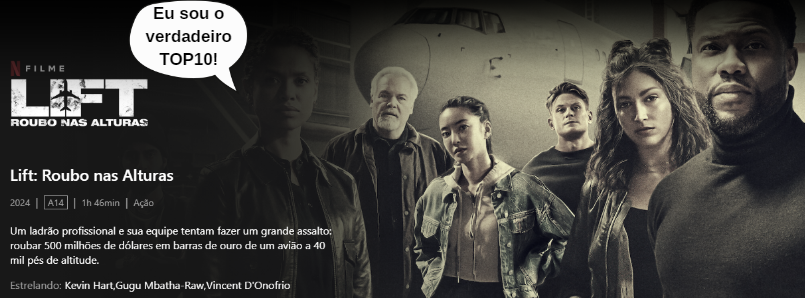

In [46]:
filmes_duplicados_corrigidos.head()

,country_name,week,category,titulo,titleType,originalTitle,startYear,runtimeMinutes,genres,faixa_tempo,Ano_top_10
0,Brazil,2024-02-04,Films,Badland Hunters,movie,Hwang-ya,2024,107,"Action,Adventure,Drama",Filmes Longos,2024
14,Brazil,2024-02-04,Films,Lift,movie,Lift,2024,107,"Action,Comedy,Crime",Filmes Longos,2024
23,Brazil,2024-02-04,Films,Sixty Minutes,movie,60 Minuten,2024,88,"Action,Adventure,Drama",Filmes Médios,2024
27,Brazil,2024-01-28,Films,Sixty Minutes,movie,60 Minuten,2024,88,"Action,Adventure,Drama",Filmes Médios,2024
28,Brazil,2024-01-28,Films,Badland Hunters,movie,Hwang-ya,2024,107,"Action,Adventure,Drama",Filmes Longos,2024


In [47]:
filmes_duplicados_corrigidos.shape

(647, 11)

Criando um Dataset com os filmes duplicados que não estão presentes no Dataset filmes_duplicados_corrigidos

In [48]:
# Filtrando as linhas onde 'startYear' é diferente de 'Ano_top_10'
filmes_duplicados = filmes_duplicados[filmes_duplicados['startYear'] != filmes_duplicados['Ano_top_10']]

In [49]:
filmes_duplicados.head()

,country_name,week,category,titulo,titleType,originalTitle,startYear,runtimeMinutes,genres,faixa_tempo,Ano_top_10
1,Brazil,2024-02-04,Films,Finding You,movie,Finding You,2019,97,"Drama,Romance",Filmes Médios,2024
2,Brazil,2024-02-04,Films,Finding You,movie,Finding You,2020,119,"Drama,Romance",Filmes Longos,2024
5,Brazil,2024-02-04,Films,Mindcage,movie,Mindcage,2022,96,"Crime,Drama,Mystery",Filmes Médios,2024
6,Brazil,2024-02-04,Films,Society of the Snow,movie,La sociedad de la nieve,2023,144,"Adventure,Drama,History",Filmes Longos,2024
7,Brazil,2024-02-04,Films,Lift,movie,Lift,1997,91,Sci-Fi,Filmes Médios,2024


In [50]:
filmes_duplicados.shape

(2233, 11)

In [51]:
# Verificando os títulos de filmes_duplicados estão presentes em filmes_duplicados_corrigidos
filmes_duplicados['Duplicado'] = filmes_duplicados['titulo'].isin(filmes_duplicados_corrigidos['titulo'])

In [52]:
filmes_duplicados.head(15)

,country_name,week,category,titulo,titleType,originalTitle,startYear,runtimeMinutes,genres,faixa_tempo,Ano_top_10,Duplicado
1,Brazil,2024-02-04,Films,Finding You,movie,Finding You,2019,97,"Drama,Romance",Filmes Médios,2024,False
2,Brazil,2024-02-04,Films,Finding You,movie,Finding You,2020,119,"Drama,Romance",Filmes Longos,2024,False
5,Brazil,2024-02-04,Films,Mindcage,movie,Mindcage,2022,96,"Crime,Drama,Mystery",Filmes Médios,2024,False
6,Brazil,2024-02-04,Films,Society of the Snow,movie,La sociedad de la nieve,2023,144,"Adventure,Drama,History",Filmes Longos,2024,False
7,Brazil,2024-02-04,Films,Lift,movie,Lift,1997,91,Sci-Fi,Filmes Médios,2024,True
8,Brazil,2024-02-04,Films,Lift,movie,Lift,2001,85,"Crime,Drama",Filmes Médios,2024,True
9,Brazil,2024-02-04,Films,Lift,movie,Lift,2006,88,Thriller,Filmes Médios,2024,True
10,Brazil,2024-02-04,Films,Lift,movie,Lift,2018,95,Drama,Filmes Médios,2024,True
11,Brazil,2024-02-04,Films,Lift,movie,Lift,2019,55,Documentary,Filmes Médios,2024,True
12,Brazil,2024-02-04,Films,Lift,movie,Lift,2021,134,"Drama,Horror,Mystery",Filmes Longos,2024,True


In [53]:
# Contar quantas vezes o valor 'True' apareceu na coluna 'Duplicado'
filmes_duplicados['Duplicado'].value_counts()[True]

1356

Desta forma, temos 1356 filmes que podem ser excluídos, uma vez que representam títulos duplicados de filmes que ficaram no TOP_10 durante o ano de seu lançamento.

In [54]:
# Removendo linhas onde há 'True' na coluna 'Duplicado
filmes_duplicados = filmes_duplicados[filmes_duplicados['Duplicado'] != True]

In [55]:
filmes_duplicados.shape

(877, 12)

In [56]:
filmes_duplicados.head(15)

,country_name,week,category,titulo,titleType,originalTitle,startYear,runtimeMinutes,genres,faixa_tempo,Ano_top_10,Duplicado
1,Brazil,2024-02-04,Films,Finding You,movie,Finding You,2019,97,"Drama,Romance",Filmes Médios,2024,False
2,Brazil,2024-02-04,Films,Finding You,movie,Finding You,2020,119,"Drama,Romance",Filmes Longos,2024,False
5,Brazil,2024-02-04,Films,Mindcage,movie,Mindcage,2022,96,"Crime,Drama,Mystery",Filmes Médios,2024,False
6,Brazil,2024-02-04,Films,Society of the Snow,movie,La sociedad de la nieve,2023,144,"Adventure,Drama,History",Filmes Longos,2024,False
26,Brazil,2024-01-28,Films,Mindcage,movie,Mindcage,2022,96,"Crime,Drama,Mystery",Filmes Médios,2024,False
45,Brazil,2024-01-28,Films,Society of the Snow,movie,La sociedad de la nieve,2023,144,"Adventure,Drama,History",Filmes Longos,2024,False
46,Brazil,2024-01-28,Films,The Kitchen,movie,The Kitchen,1961,76,Drama,Filmes Médios,2024,False
47,Brazil,2024-01-28,Films,The Kitchen,movie,The Kitchen,2006,78,Documentary,Filmes Médios,2024,False
48,Brazil,2024-01-28,Films,The Kitchen,movie,A Cozinha,2022,61,Drama,Filmes Médios,2024,False
49,Brazil,2024-01-28,Films,The Kitchen,movie,The Kitchen,2012,80,"Comedy,Drama",Filmes Médios,2024,False


## Ainda temos 877 filmes para realizar uma filtragem:
### Excluindo filmes muito antigos
- Ao revisar nosso conjunto de dados, notamos a presença de filmes antigos e recentes com títulos idênticos. É plausível que os filmes mais recentes tenham mais probabilidade de ter figurado nos TOP 10. Assim, para garantir a precisão de nossas análises, é prudente estabelecer um critério para excluir filmes mais antigos.

- Referenciando um estudo sobre o período de lançamento de filmes na Netflix: 'How long after theatrical release do movies appear on Netflix?', disponível em :https://whatsnewonnetflix.com/news/how-long-after-theatrical-release-do-movies-appear-on-netflix/
Observamos que, em média, a Netflix leva cerca de 3 anos para disponibilizar um filme após seu lançamento nos cinemas. Considerando que a contagem dos TOP 10 iniciou em 2021, estabelecemos que filmes com data de lançamento muito anterior a 2018 são improváveis de terem sido incluídos.

No entanto, temos o caso do filme "Kung Fu Panda 3", lançado em 2016 e disponibilizado na Netflix somente em 2021, cinco anos após sua estreia nos cinemas.
- Em uma rápida pesquisa na Internet com o termo 'The Oldest Movie in Netflix's Top 10', descobrimos através do site: https://screenrant.com/exodus-movie-netflix-chart-rank/#:~:text=Despite%20criticism%20and%20financial%20disappointment,alongside%20more%20contemporary%20Netflix%20hits, que o filme 'Êxodo: Deuses e Reis, lançado em 2014 é o filme mais antigo a estar no TOP 10  da atualidade da Netflix.
Com base nessa observação, estabelecemos o ano de 2014 como ponto de corte para a filtragem de filmes.
- Reconhecemos que essa abordagem pode resultar na perda de alguns dados, mas é essencial para garantir que nossas análises sejam mais fidedignas

In [57]:
# Remover os filmes com startYear inferior a 2014
filmes_duplicados = filmes_duplicados[filmes_duplicados['startYear'] >= 2014]

In [58]:
filmes_duplicados.shape

(441, 12)

In [59]:
filmes_duplicados.head(10)

,country_name,week,category,titulo,titleType,originalTitle,startYear,runtimeMinutes,genres,faixa_tempo,Ano_top_10,Duplicado
1,Brazil,2024-02-04,Films,Finding You,movie,Finding You,2019,97,"Drama,Romance",Filmes Médios,2024,False
2,Brazil,2024-02-04,Films,Finding You,movie,Finding You,2020,119,"Drama,Romance",Filmes Longos,2024,False
5,Brazil,2024-02-04,Films,Mindcage,movie,Mindcage,2022,96,"Crime,Drama,Mystery",Filmes Médios,2024,False
6,Brazil,2024-02-04,Films,Society of the Snow,movie,La sociedad de la nieve,2023,144,"Adventure,Drama,History",Filmes Longos,2024,False
26,Brazil,2024-01-28,Films,Mindcage,movie,Mindcage,2022,96,"Crime,Drama,Mystery",Filmes Médios,2024,False
45,Brazil,2024-01-28,Films,Society of the Snow,movie,La sociedad de la nieve,2023,144,"Adventure,Drama,History",Filmes Longos,2024,False
48,Brazil,2024-01-28,Films,The Kitchen,movie,A Cozinha,2022,61,Drama,Filmes Médios,2024,False
50,Brazil,2024-01-28,Films,The Kitchen,movie,The Kitchen,2023,<NA>,Comedy,NaN,2024,False
51,Brazil,2024-01-28,Films,The Kitchen,movie,The Kitchen,2023,107,"Adventure,Drama,Sci-Fi",Filmes Longos,2024,False
52,Brazil,2024-01-28,Films,The Kitchen,movie,The Kitchen,2019,102,"Action,Crime,Drama",Filmes Longos,2024,False


#Agora precisamos juntar os 3 DataSets:
 - filmes_brasil_car, com 224 linhas;
 - filmes_duplicados_corrigidos, com 647 linhas;
 - filmes_duplicados com 441 linhas
 Ao total teremos um Dataset com 1312 linhas, o arquivo original da Netflix continha 1360 linhas.

In [60]:
#Removendo colunas divergente para realizar a junção dos DFs
filmes_duplicados_corrigidos = filmes_duplicados_corrigidos.drop(['Ano_top_10'], axis=1)
filmes_duplicados_corrigidos.head()

,country_name,week,category,titulo,titleType,originalTitle,startYear,runtimeMinutes,genres,faixa_tempo
0,Brazil,2024-02-04,Films,Badland Hunters,movie,Hwang-ya,2024,107,"Action,Adventure,Drama",Filmes Longos
14,Brazil,2024-02-04,Films,Lift,movie,Lift,2024,107,"Action,Comedy,Crime",Filmes Longos
23,Brazil,2024-02-04,Films,Sixty Minutes,movie,60 Minuten,2024,88,"Action,Adventure,Drama",Filmes Médios
27,Brazil,2024-01-28,Films,Sixty Minutes,movie,60 Minuten,2024,88,"Action,Adventure,Drama",Filmes Médios
28,Brazil,2024-01-28,Films,Badland Hunters,movie,Hwang-ya,2024,107,"Action,Adventure,Drama",Filmes Longos


In [61]:
#Removendo colunas divergente para realizar a junção dos DFs
filmes_duplicados = filmes_duplicados.drop(['Ano_top_10', 'Duplicado'], axis=1)
filmes_duplicados.head()

,country_name,week,category,titulo,titleType,originalTitle,startYear,runtimeMinutes,genres,faixa_tempo
1,Brazil,2024-02-04,Films,Finding You,movie,Finding You,2019,97,"Drama,Romance",Filmes Médios
2,Brazil,2024-02-04,Films,Finding You,movie,Finding You,2020,119,"Drama,Romance",Filmes Longos
5,Brazil,2024-02-04,Films,Mindcage,movie,Mindcage,2022,96,"Crime,Drama,Mystery",Filmes Médios
6,Brazil,2024-02-04,Films,Society of the Snow,movie,La sociedad de la nieve,2023,144,"Adventure,Drama,History",Filmes Longos
26,Brazil,2024-01-28,Films,Mindcage,movie,Mindcage,2022,96,"Crime,Drama,Mystery",Filmes Médios


In [62]:
filmes_netflix_corrigido = pd.concat([filmes_brasil_car,filmes_duplicados_corrigidos,filmes_duplicados])

In [63]:
display(filmes_netflix_corrigido)

,country_name,week,category,titulo,titleType,originalTitle,startYear,runtimeMinutes,genres,faixa_tempo
3,Brazil,2024-02-04,Films,Orion and the Dark,movie,Orion and the Dark,2024,93,"Adventure,Animation,Comedy",Filmes Médios
4,Brazil,2024-02-04,Films,The Greatest Night in Pop,movie,The Greatest Night in Pop,2024,96,"Documentary,Music",Filmes Médios
24,Brazil,2024-02-04,Films,Minions,movie,Minions,2015,91,"Adventure,Animation,Comedy",Filmes Médios
25,Brazil,2024-02-04,Films,Despicable Me 3,movie,Despicable Me 3,2017,89,"Adventure,Animation,Comedy",Filmes Médios
55,Brazil,2024-01-28,Films,Deepwater Horizon,movie,Deepwater Horizon,2016,107,"Action,Drama,History",Filmes Longos
...,...,...,...,...,...,...,...,...,...,...
3770,Brazil,2021-07-11,Films,The Water Man,movie,The Water Man,2020,91,"Adventure,Drama,Family",Filmes Médios
3780,Brazil,2021-07-04,Films,Silver Skates,movie,Serebryanye konki,2020,130,"Adventure,Drama,Family",Filmes Longos
3783,Brazil,2021-07-04,Films,What Men Want,movie,What Men Want,2019,117,"Comedy,Fantasy,Romance",Filmes Longos
3785,Brazil,2021-07-04,Films,Kung Fu Panda 3,movie,Kung Fu Panda 3,2016,95,"Action,Adventure,Animation",Filmes Médios


In [64]:
#Verificando filmes com valores nulo na coluna 'genres'
filmes_netflix_corrigido['genres'].isnull().sum()

47

In [65]:
#Removendo as linhas com valores nulos
filmes_netflix_corrigido = filmes_netflix_corrigido.dropna(subset=['genres'])

In [66]:
filmes_netflix_corrigido.head()

,country_name,week,category,titulo,titleType,originalTitle,startYear,runtimeMinutes,genres,faixa_tempo
3,Brazil,2024-02-04,Films,Orion and the Dark,movie,Orion and the Dark,2024,93,"Adventure,Animation,Comedy",Filmes Médios
4,Brazil,2024-02-04,Films,The Greatest Night in Pop,movie,The Greatest Night in Pop,2024,96,"Documentary,Music",Filmes Médios
24,Brazil,2024-02-04,Films,Minions,movie,Minions,2015,91,"Adventure,Animation,Comedy",Filmes Médios
25,Brazil,2024-02-04,Films,Despicable Me 3,movie,Despicable Me 3,2017,89,"Adventure,Animation,Comedy",Filmes Médios
55,Brazil,2024-01-28,Films,Deepwater Horizon,movie,Deepwater Horizon,2016,107,"Action,Drama,History",Filmes Longos


In [67]:
#Agora vamos renomear as demais colunas e remover a coluna category e titleType que não serão mais utilizadas.
filmes_netflix_corrigido.rename(columns={
    'country_name': 'pais',
    'week': 'semana',
    'originalTitle': 'titulo_original',
    'startYear': 'ano_lancamento',
    'genres': 'generos',
    'runtimeMinutes': 'duracao_filme'
}, inplace=True)

In [68]:
#Removendo colunas
filmes_netflix_corrigido = filmes_netflix_corrigido.drop(['category', 'titleType'], axis=1)
filmes_netflix_corrigido.head()

,pais,semana,titulo,titulo_original,ano_lancamento,duracao_filme,generos,faixa_tempo
3,Brazil,2024-02-04,Orion and the Dark,Orion and the Dark,2024,93,"Adventure,Animation,Comedy",Filmes Médios
4,Brazil,2024-02-04,The Greatest Night in Pop,The Greatest Night in Pop,2024,96,"Documentary,Music",Filmes Médios
24,Brazil,2024-02-04,Minions,Minions,2015,91,"Adventure,Animation,Comedy",Filmes Médios
25,Brazil,2024-02-04,Despicable Me 3,Despicable Me 3,2017,89,"Adventure,Animation,Comedy",Filmes Médios
55,Brazil,2024-01-28,Deepwater Horizon,Deepwater Horizon,2016,107,"Action,Drama,History",Filmes Longos


In [69]:
filmes_netflix_corrigido.shape

(1265, 8)

In [70]:
brasil_netflix_films.shape

(1360, 4)

Desta forma, do conjunto de dados completo da Netflix, que inclui exclusivamente filmes brasileiros, observamos uma diferença de apenas 95 filmes em relação ao nosso conjunto de dados após a limpeza.

In [71]:
#Salvando o arquivo
filmes_netflix_corrigido.to_csv('filmes_netflix_corrigido.csv', index=False)